# Exercício 2
* O uso do PCA melhorou o Recall?
* O uso de seleção de atributos melhorou o Recall?
* Plote a curva ROC do seu algoritmo original, com PCA e com seleção de atributos, no mesmo gráfico

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar

import warnings
warnings.filterwarnings('ignore')

In [2]:
bc = load_breast_cancer()

data = bc.data
target = bc.target

In [3]:
#Acurácia inicial
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42, shuffle = True)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
#print(y_pred)
#print(y_train)



print('y_pred =', round(accuracy_score(y_test, y_pred),2)*100,'%')

y_pred = 94.0 %


In [4]:
#GridSearch
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors': [3, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['ball_tree', 'kd_tree'],
    'leaf_size' : [1,2,3,4,5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

knn = KNeighborsClassifier(n_neighbors=3)

gs = GridSearchCV(knn, grid_params, cv=5, n_jobs=1)

gs_results = gs.fit(X_train, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.92904989747095
KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
{'algorithm': 'ball_tree', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}


In [5]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size= 1, metric='manhattan', n_neighbors=6, weights='uniform')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [6]:
# avaliando o modelo com o scikit-learn
from sklearn.metrics import accuracy_score
print('Acurácia:', accuracy_score(y_test, y_pred))

Acurácia: 0.9787234042553191


In [7]:
# calculando a matriz utilizando scikit-learn
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print('---')

# obtendo os resultados com scikit-learn
vn, fp, fn, vp = confusion_matrix(y_test, y_pred).ravel()
print('VP:', vp)
print('FP:', fp)
print('VN:', vn)
print('FN:', fn)

[[ 66   1]
 [  3 118]]
---
VP: 118
FP: 1
VN: 66
FN: 3


In [8]:
#Calculando Acuracidade, Precisão, recall e f-1 score

def Resultados_antes_pca (VP, FP, VN, FN):
    ACC = (VP+VN) / (VP+FP+VN+FN)
    P = VP/(VP+FP)
    R = VP/(VP+FN)
    F = 2*(P*R/(P+R))
    
    print('ACC= ',ACC)
    print('P= ',P)
    print('R_antes= ',R)
    print('F= ',F)
    
Resultados_antes_pca(vp,fp,vn,fn)

ACC=  0.9787234042553191
P=  0.9915966386554622
R_antes=  0.9752066115702479
F=  0.9833333333333334


### Recall com dados originais = 0.97521

## APLICAÇÃO PCA

In [9]:
bc_pca = load_breast_cancer()

data_2 = bc_pca.data
target_2 = bc_pca.target

In [10]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_2, target_2, test_size=0.33, random_state=42, shuffle = True)

In [11]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size= 1, metric='manhattan', n_neighbors=6, weights='uniform')
knn.fit(X_train_2, y_train)

y_pred_2 = knn.predict(X_test)

In [12]:
pca = PCA(n_components=0.95, whiten=True)

data_pca = pca.fit_transform(data_2)

print('Número original de atributos:', data_2.shape[1])
print('Número reduzido de atributos:', data_pca.shape[1])

Número original de atributos: 30
Número reduzido de atributos: 1


In [13]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_pca, target_2, test_size=0.33, random_state=42, shuffle = True)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)

print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

#######

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_pca, target_2, test_size=0.33, random_state=42, shuffle = True)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)

print('Acurácia nos dados reduzidos (PCA em tudo):', accuracy_score(y_test, y_pred))

#######

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_pca, target_2, test_size=0.33, random_state=42, shuffle = True)


pca = PCA(n_components=0.95, whiten=True)
X_train_2 = pca.fit_transform(X_train_2)
X_test_2 = pca.transform(X_test_2)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train_2, y_train_2)
y_pred_2 = model.predict(X_test_2)

print('Acurácia nos dados originais (PCA da parte certa):', accuracy_score(y_test_2, y_pred_2))

Acurácia nos dados originais: 0.9787234042553191
Acurácia nos dados reduzidos (PCA em tudo): 0.9787234042553191
Acurácia nos dados originais (PCA da parte certa): 0.9468085106382979


In [14]:
# calculando a matriz utilizando scikit-learn
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_2, y_pred_2))

print('---')

# obtendo os resultados com scikit-learn
vn, fp, fn, vp = confusion_matrix(y_test_2, y_pred_2).ravel()
print('VP:', vp)
print('FP:', fp)
print('VN:', vn)
print('FN:', fn)

[[ 58   9]
 [  1 120]]
---
VP: 120
FP: 9
VN: 58
FN: 1


In [15]:
#Calculando pós PCA:  Acuracidade, Precisão, recall e f-1 score

def Resultados_PCA (VP, FP, VN, FN):
    ACC = (VP+VN) / (VP+FP+VN+FN)
    P = VP/(VP+FP)
    R = VP/(VP+FN)
    F = 2*(P*R/(P+R))
    
    print('ACC= ',ACC)
    print('P= ',P)
    print('R PCA= ',R)
    print('F= ',F)
    
Resultados_PCA(vp,fp,vn,fn)

ACC=  0.9468085106382979
P=  0.9302325581395349
R PCA=  0.9917355371900827
F=  0.96


### Recall com dados ajustados com PCA = 0.991735

## APLICAÇÃO SELEÇÃO DE ATRIBUTOS

In [16]:
bc_atrib = load_breast_cancer()

data_3 = bc_pca.data
target_3 = bc_pca.target

In [17]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_3, target_3, test_size=0.33, random_state=42, shuffle = True)

In [18]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size= 1, metric='manhattan', n_neighbors=6, weights='uniform')
knn.fit(X_train_3, y_train_3)

y_pred_3 = knn.predict(X_test_3)

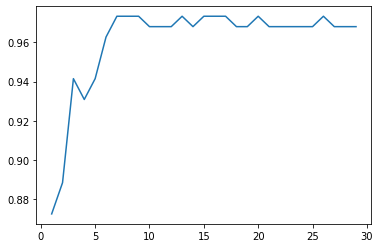

In [19]:
#Procurando melhor valor p/K

k_hist = []
acc = []

for k in range(1,30):
    
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_3, target_3, test_size=0.33, random_state=42, shuffle = True)

    fvalue_selector = SelectKBest(f_classif, k=k)
    data_kbest = fvalue_selector.fit_transform(X_train_3, y_train_3)

    model_3 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
    model_3.fit(data_kbest, y_train_3)
    data_test_kbest = fvalue_selector.transform(X_test_3)
    y_pred_3 = model_3.predict(data_test_kbest)
    
    k_hist.append(k)
    acc.append(accuracy_score(y_test_3, y_pred_3))
    
ax = sns.lineplot(x=np.array(k_hist), y=np.array(acc))

In [30]:
#Seleção de Atributos

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_3, target_3, test_size=0.33, random_state=42, shuffle = True)

fvalue_selector = SelectKBest(f_classif, k=20)
data_kbest = fvalue_selector.fit_transform(X_train_3, y_train_3)

print('Número original de atributos:', data_3.shape[1])
print('Número reduzido de atributos:', data_kbest.shape[1])

###

model_3 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
model_3.fit(X_train_3, y_train_3)
y_pred_3 = model_3.predict(X_test_3)
print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(data_kbest, y_train_3)
data_test_kbest = fvalue_selector.transform(X_test_3)
y_pred_3 = model.predict(data_test_kbest)
print('Acurácia nos dados Kbest:', accuracy_score(y_test_3, y_pred_3))

Número original de atributos: 30
Número reduzido de atributos: 20
Acurácia nos dados originais: 0.973404255319149
Acurácia nos dados Kbest: 0.973404255319149


In [31]:
# calculando a matriz utilizando scikit-learn
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_3, y_pred_3))

print('---')

# obtendo os resultados com scikit-learn
vn, fp, fn, vp = confusion_matrix(y_test_3, y_pred_3).ravel()
print('VP:', vp)
print('FP:', fp)
print('VN:', vn)
print('FN:', fn)

[[ 65   2]
 [  3 118]]
---
VP: 118
FP: 2
VN: 65
FN: 3


In [32]:
#Calculando pós selecão de atributos:  Acuracidade, Precisão, recall e f-1 score

def Resultados_Atributos (VP, FP, VN, FN):
    ACC = (VP+VN) / (VP+FP+VN+FN)
    P = VP/(VP+FP)
    R = VP/(VP+FN)
    F = 2*(P*R/(P+R))
    
    print('ACC= ',ACC)
    print('P= ',P)
    print('R atributos= ',R)
    print('F= ',F)
    
Resultados_Atributos(vp,fp,vn,fn)

ACC=  0.973404255319149
P=  0.9833333333333333
R atributos=  0.9752066115702479
F=  0.979253112033195


## PLOTANDO ROC

In [23]:
prob_6 = []
prob_6_pca = []
prob_9 = []

prob_6 = knn.fit(X_train, y_train)
prob_6 = knn.predict_proba(X_test)

prob_6_pca = model.fit(X_train_2, y_train_2)
prob_6_pca = model.predict_proba(X_test_2)
    
prob_9 = model_3.fit(X_train_3, y_train_3)
prob_9 = model_3.predict_proba(X_test_3)

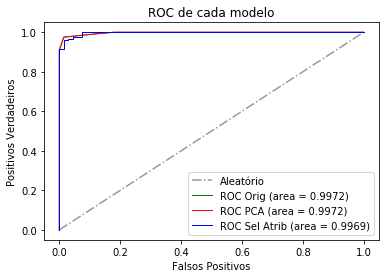

In [24]:
#Plotando novo ROC

#Plotando gráfico com os valores de K = [6 para dados originais, 6 para PCA e 9 para seleção de atributos]

fpr_6, tpr_6, thresholds_6 = roc_curve(y_test[:], prob_6[:,1])
roc_auc = auc(fpr_6, tpr_6)

fpr_6_pca, tpr_6_pca, thresholds_6_pca = roc_curve(y_test_2[:], prob_6[:,1])
roc_auc_6_pca = auc(fpr_6_pca, tpr_6_pca)

fpr_9, tpr_9, thresholds_9 = roc_curve(y_test_3[:], prob_9[:,1])
roc_auc_9 = auc(fpr_9, tpr_9)

plt.plot([0, 1], [0, 1], '-.', color=(0.6, 0.6, 0.6), label='Aleatório')


plt.plot(fpr_6, tpr_6, lw=1, label='ROC Orig (area = %0.4f)' % roc_auc, color='green')
plt.plot(fpr_6_pca, tpr_6_pca, lw=1, label='ROC PCA (area = %0.4f)' % roc_auc_6_pca, color='red')
plt.plot(fpr_9, tpr_9, lw=1, label='ROC Sel Atrib (area = %0.4f)' % roc_auc_9, color='blue')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Positivos Verdadeiros')
plt.title('ROC de cada modelo')
plt.legend(loc="lower right")
plt.show()

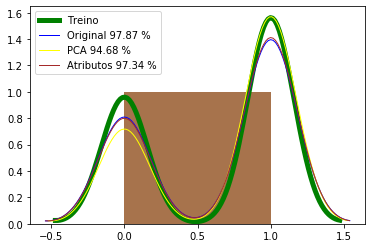

In [25]:
sns.distplot(y_train, bins=1, kde_kws={"color": "g", "lw": 5, "label": "Treino"})
sns.distplot(y_pred, bins=1, kde_kws={"color": "blue", "lw": 1, "label": "Original 97.87 %"})
sns.distplot(y_pred_2, bins=1, kde_kws={"color": "yellow", "lw": 1, "label": "PCA 94.68 %"})
sns.distplot(y_pred_3, bins=1, kde_kws={"color": "brown", "lw": 1, "label": "Atributos 97.34 %"})

## Comparando modelo MCNEMMAR

In [26]:
def build_contingence_table(target, Y_pred, Y_pred_2):
    y1_and_y2 = 0
    y1_and_not_y2 = 0
    y2_and_not_y1 = 0
    not_y1_and_not_y2 = 0
    for y, y1, y2 in zip(target, Y_pred, Y_pred_2):
        if y == y1 == y2:
            y1_and_y2 += 1
        elif y != y1 and y != y2:
            not_y1_and_not_y2 += 1
        elif y == y1 and y != y2:
            y1_and_not_y2 += 1
        elif y != y1 and y == y2:
            y2_and_not_y1 += 1
            
    contingency_table = [[y1_and_y2, y1_and_not_y2], 
                         [y2_and_not_y1, not_y1_and_not_y2]]
    
    return contingency_table

In [27]:
contingence_table = build_contingence_table(y_test, y_pred, y_pred_2)

import pprint

pprint.pprint(contingence_table)

[[175, 9], [3, 1]]


In [28]:
result = mcnemar(contingence_table, exact=True)
    
    
if result.pvalue >= 0.001:
    print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
else:
    print('statistic=%.3f, p-value=%.3e' % (result.statistic, result.pvalue))

# interpretando o p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Mesma proporção de erros (aceito H0, portanto não é possível afirmar que modelo original e PCA são estatisticamente diferentes)')
else:
    print('Proporções de erros diferentes (rejeitou H0)')

statistic=3.000, p-value=0.146
Mesma proporção de erros (aceito H0, portanto não é possível afirmar que modelo original e PCA são estatisticamente diferentes)


In [29]:
for i in range(2,11):
    for y in range((i+1),11):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
    
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train_2, y_train_2)
        y_pred_2 = model.predict(X_test_2)
        
        contingence_table = build_contingence_table(y_test, y_pred, y_pred_2)
        
        result = mcnemar(contingence_table, exact=True)
    
    
        if result.pvalue >= 0.001:
            print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
        else:
            print('statistic=%.3f, p-value=%.3e' % (result.statistic, result.pvalue))

        # interpretando o p-value
        alpha = 0.05
        if result.pvalue > alpha:
            print('Knn', i, 'VS', 'Knn', y)
            print('Mesma proporção de erros (falhou em rejeitar H0)')
        else:
            print('Knn', i, 'VS', 'Knn', y)
            print('Proporções de erros diferentes (rejeitou H0)')

statistic=10.000, p-value=0.008
Knn 2 VS Knn 3
Proporções de erros diferentes (rejeitou H0)
statistic=10.000, p-value=0.008
Knn 2 VS Knn 4
Proporções de erros diferentes (rejeitou H0)
statistic=10.000, p-value=0.008
Knn 2 VS Knn 5
Proporções de erros diferentes (rejeitou H0)
statistic=10.000, p-value=0.008
Knn 2 VS Knn 6
Proporções de erros diferentes (rejeitou H0)
statistic=10.000, p-value=0.008
Knn 2 VS Knn 7
Proporções de erros diferentes (rejeitou H0)
statistic=10.000, p-value=0.008
Knn 2 VS Knn 8
Proporções de erros diferentes (rejeitou H0)
statistic=10.000, p-value=0.008
Knn 2 VS Knn 9
Proporções de erros diferentes (rejeitou H0)
statistic=10.000, p-value=0.008
Knn 2 VS Knn 10
Proporções de erros diferentes (rejeitou H0)
statistic=9.000, p-value=0.824
Knn 3 VS Knn 4
Mesma proporção de erros (falhou em rejeitar H0)
statistic=9.000, p-value=0.824
Knn 3 VS Knn 5
Mesma proporção de erros (falhou em rejeitar H0)
statistic=9.000, p-value=0.824
Knn 3 VS Knn 6
Mesma proporção de erros (f